Demonstrate Gradient Descent Algorithm

Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Importing the dataset

In [2]:
df=pd.read_csv(r"C:/Users/vighn/Downloads/insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

The dataset comprises of 1338 rows and 7 columns

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the dataset , so we can proceed with the data

In [7]:
X=df[['age','bmi','children']]
Y=df['charges']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [8]:
import random
def initialize(dim):
  b=random.random()
  theta=np.random.rand(dim)
  return b,theta
b,theta=initialize(3)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.17702781563853598 Weights:  [0.98196859 0.20108337 0.59474065]


In [9]:
def predict_Y(b,theta,X):
  return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([-1.86657398, -1.24954715,  0.41069257, -1.05939861, -0.92567358,
       -1.09910405,  0.69652493,  0.86626862,  0.44182592,  0.93103817])

In [10]:
import math
def get_cost(Y,Y_hat):
  Y_resd=Y-Y_hat
  return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

1.736404808489161

In [11]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
  db=(np.sum(y_hat-y)*2)/len(y)
  dw=(np.dot((y_hat-y),x)*2)/len(y)
  b_1=b_0-learning_rate*db
  theta_1=theta_o-learning_rate*dw
  return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.17702781563853598 theta:  [0.98196859 0.20108337 0.59474065]
After first update -Bias:  0.17348725932576525 theta:  [0.96737568 0.19873249 0.58332896]


1.736404808489161

In [12]:
def run_gradient_descent(X,Y,alpha,num_iterations):
  b,theta=initialize(X.shape[1])
  iter_num=0
  gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
  result_idx=0
  for each_iter in range(num_iterations):
    Y_hat=predict_Y(b,theta,X)
    this_cost=get_cost(Y,Y_hat)
    prev_b=b
    prev_theta=theta
    b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
    if(iter_num%10==0):
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
    result_idx=result_idx+1
    iter_num +=1
  print("Final Estimate of b and theta :",b,theta)
  return gd_iterations_df,b,theta
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta : 0.36983789028326686 [0.6314186  0.37532758 0.05492042]


In [13]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.627817
10,10.0,1.596695
20,20.0,1.566872
30,30.0,1.538293
40,40.0,1.510907
50,50.0,1.484663
60,60.0,1.459514
70,70.0,1.435413
80,80.0,1.412318
90,90.0,1.390185


As we print the cost function for each iteration we can see the decrease in the cost function.

Text(0, 0.5, 'Cost or MSE')

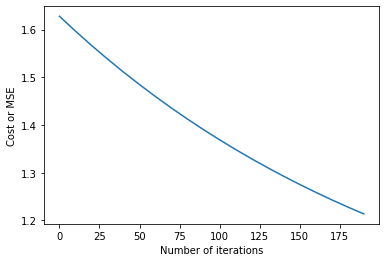

In [14]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

The plot above shows that MSE(Mean Squared Error) decreases as the number of iterations increase.

Final Estimate of b and theta : -2.776017703385518e-16 [0.27844011 0.16722581 0.05403954]
Final Estimate of b and theta : 0.007680060636071128 [0.27471272 0.16999506 0.07046382]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

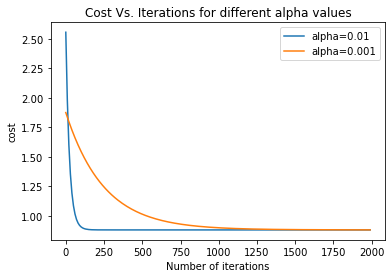

In [15]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

As we can see, 0.01 is the more optimal learning rate as it converges much quicker than 0.001.
0.01 converges around the 100-125 mark, while 0.001 takes more than 1000 iterations to reach convergence